In [ ]:
# Mounting the google drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def display(image):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

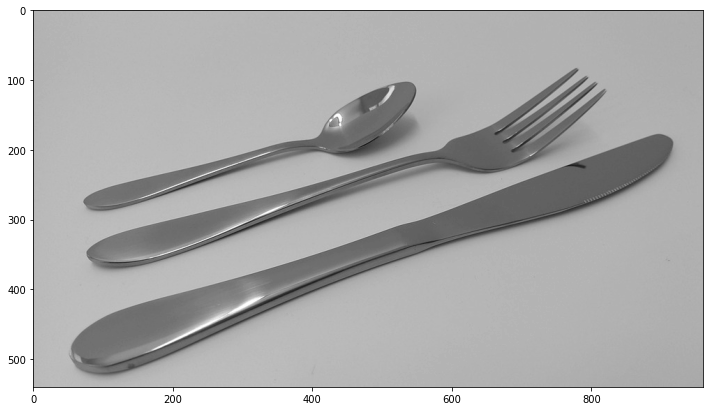

In [ ]:
img = cv2.imread('/cutlery.jpg',0)
display(img);

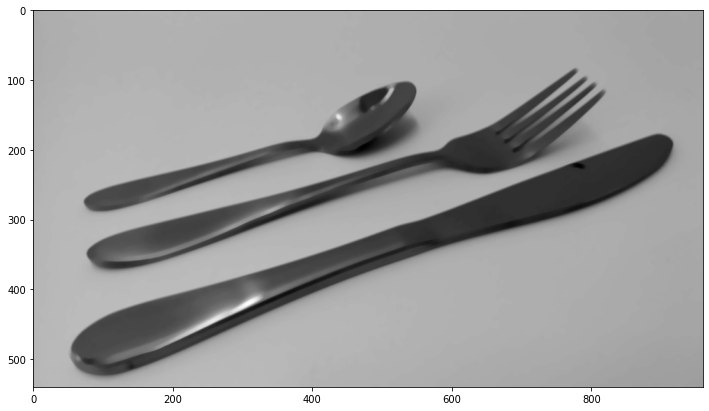

In [ ]:
blurred_img = cv2.GaussianBlur(img,ksize=(5,5),sigmaX=0.9,sigmaY=1.6)
blurred_img = cv2.medianBlur(blurred_img,ksize=9)
display(blurred_img);

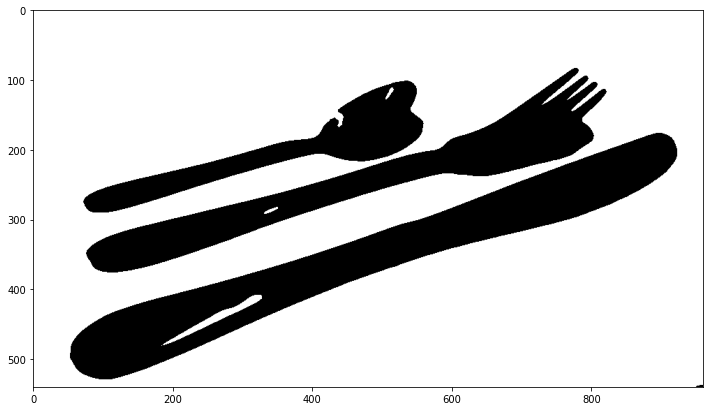

In [ ]:
ret, thresh = cv2.threshold(blurred_img,170,255,cv2.THRESH_BINARY)
display(thresh);

In [ ]:
kernel = np.ones(shape=(5,5),dtype=np.float32)
kernel

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

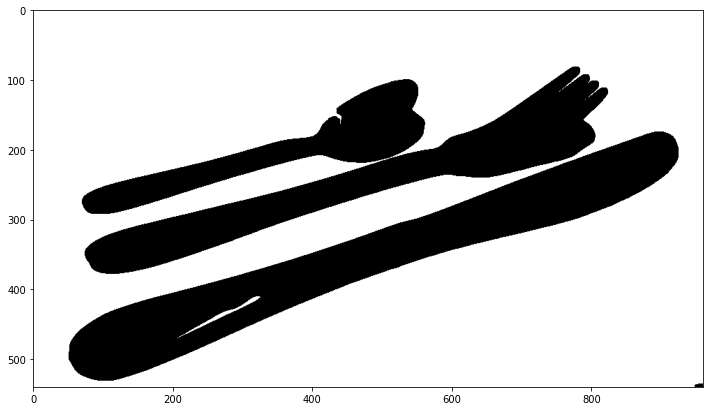

In [ ]:
eroded_img = cv2.erode(thresh,kernel,iterations=1)
display(eroded_img)

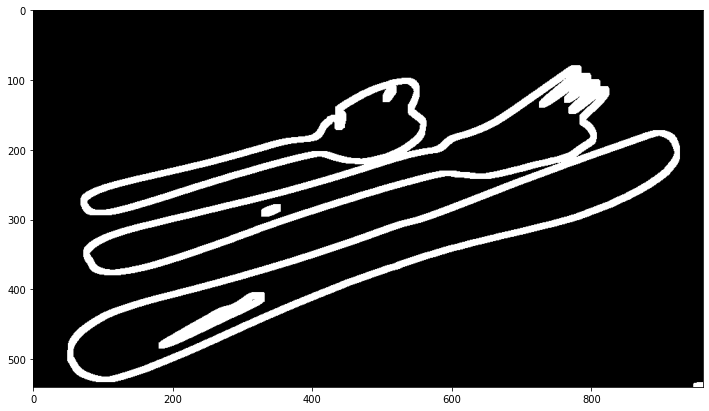

In [ ]:
gradient = cv2.morphologyEx(thresh,cv2.MORPH_GRADIENT,kernel,iterations=2)
display(gradient);

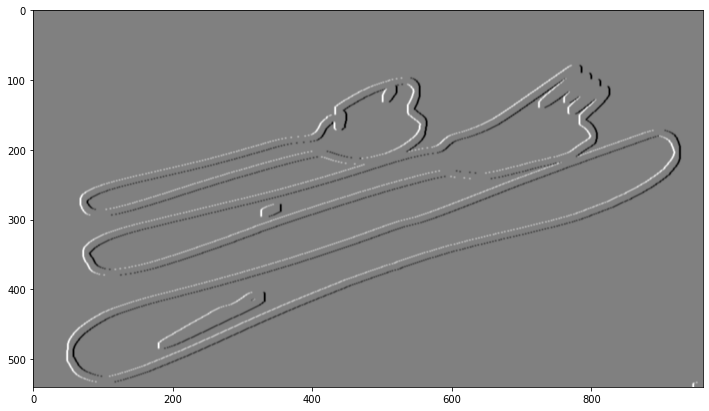

In [ ]:
sobel_x = cv2.Sobel(gradient,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)
display(sobel_x)

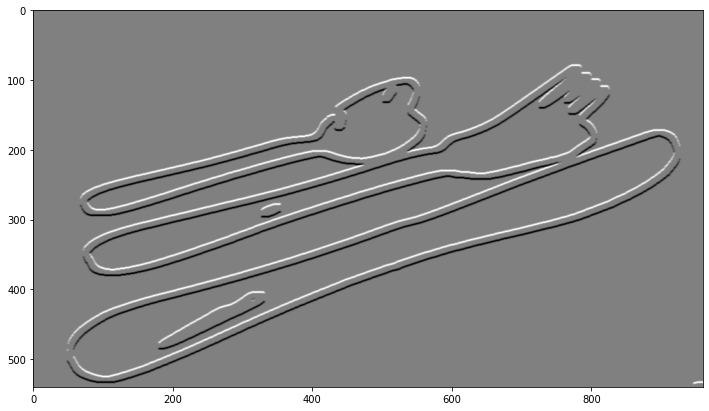

In [ ]:
sobel_y = cv2.Sobel(gradient,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5)
display(sobel_y)

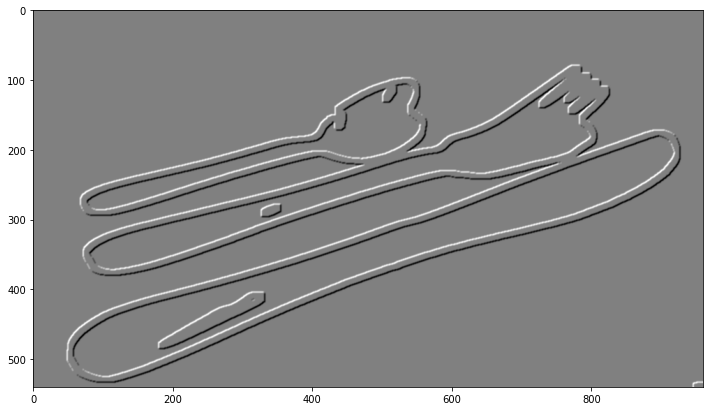

In [ ]:
merged_img = cv2.addWeighted(src1=sobel_x,src2=sobel_y,alpha=0.5,beta=0.5,gamma=0)
display(merged_img);

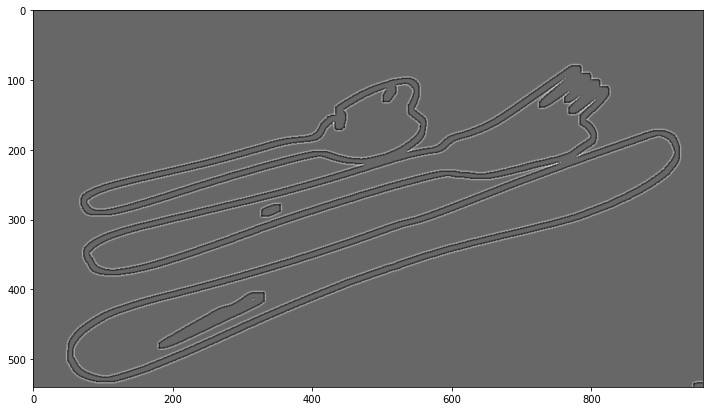

In [ ]:
laplacian_img = cv2.Laplacian(gradient,ddepth=cv2.CV_64F,ksize=5)
display(laplacian_img);

In [ ]:
med_val = np.median(gradient)
med_val

0.0

In [ ]:
gradient

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
lower_threshold = int(max(0,0.7*med_val))
upper_threshold = int(min(0,1.3*med_val))

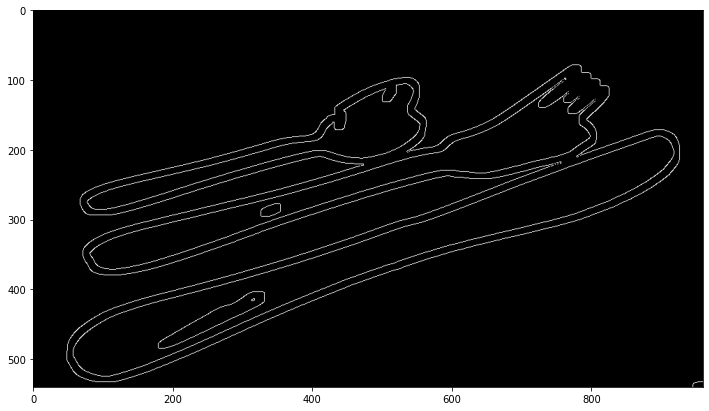

In [ ]:
canny_res = cv2.Canny(gradient,threshold1=lower_threshold,threshold2=upper_threshold)
display(canny_res);

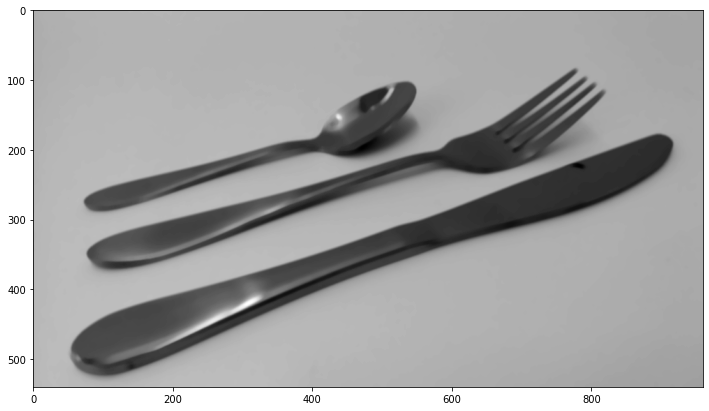

In [ ]:
filtered_img = cv2.bilateralFilter(blurred_img,d=1,sigmaColor=75,sigmaSpace=78)
display(filtered_img);